# 2. Data Acquisition And Understanding

## 2.1 Import Library, Load dan Mengenal Dataset

Dataset **[Saudi Arabia Used Cars](https://www.kaggle.com/datasets/turkibintalib/saudi-arabia-used-cars-dataset)** di Kaggle berisi sekitar **8.248 data mobil bekas** yang dikumpulkan dari situs *syarah.com*. Setiap entri mencakup informasi seperti **merek, model, tahun, warna, bahan bakar, transmisi, jarak tempuh, lokasi, dan harga**. Dataset ini sering digunakan untuk **analisis tren pasar mobil bekas di Arab Saudi** serta pembuatan **model prediksi harga mobil** berbasis machine learning. Karena sebagian data masih dalam bahasa Arab, biasanya dilakukan **pembersihan dan penerjemahan kolom** sebelum analisis.

In [199]:
# Import library dan load dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Load dataset
data_path = '../Dataset/UsedCarsSA_Unclean_EN.csv'
real_df = pd.read_csv(data_path)
df = real_df.copy()
df.head()

,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
0,https://syarah.com/%D9%83%D8%B1%D8%A7%D9%8A%D8...,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,Used,103000,Riyadh,114000,False
1,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,Used,5448,Riyadh,Negotiable,True
2,https://syarah.com/online/%D9%86%D9%8A%D8%B3%D...,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,Used,72418,Riyadh,27500,False
3,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,Used,114154,Riyadh,43000,False
4,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,Used,41912,Riyadh,59500,False


Berikut adalah **deskripsi kolom** untuk dataset **[Saudi Arabia Used Cars](https://www.kaggle.com/datasets/turkibintalib/saudi-arabia-used-cars-dataset)**:

* **Link** — Tautan ke halaman iklan mobil di situs *syarah.com*.
* **Make** — Nama perusahaan atau merek mobil.
* **Type** — Jenis atau model mobil bekas.
* **Year** — Tahun pembuatan mobil.
* **Origin** — Asal atau negara produksi mobil.
* **Color** — Warna mobil.
* **Options** — Fitur atau opsi tambahan yang dimiliki mobil.
* **Engine_Size** — Ukuran atau kapasitas mesin mobil.
* **Fuel_Type** — Jenis bahan bakar yang digunakan mobil.
* **Gear_Type** — Jenis transmisi mobil (manual atau otomatis).
* **Condition** — Kondisi mobil (misalnya baru, bekas ringan, atau bekas berat).
* **Mileage** — Jarak tempuh mobil (biasanya dalam kilometer).
* **Region** — Wilayah atau kota tempat mobil dijual di Arab Saudi.
* **Price** — Harga jual mobil dalam mata uang lokal (SAR).
* **Negotiable** — Menunjukkan apakah harga masih dapat dinegosiasikan (ya/tidak).


## 2.2 Quick Data Health Check

### 2.2.1 Melihat tipe data

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8248 entries, 0 to 8247
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Link         8248 non-null   object 
 1   Make         8248 non-null   object 
 2   Type         8248 non-null   object 
 3   Year         8248 non-null   int64  
 4   Origin       8153 non-null   object 
 5   Color        8248 non-null   object 
 6   Options      8139 non-null   object 
 7   Engine_Size  5982 non-null   float64
 8   Fuel_Type    8248 non-null   object 
 9   Gear_Type    8174 non-null   object 
 10  Condition    8248 non-null   object 
 11  Mileage      8248 non-null   int64  
 12  Region       8248 non-null   object 
 13  Price        8248 non-null   object 
 14  Negotiable   8248 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(11)
memory usage: 910.3+ KB


Dataset ini terdiri dari 8.248 baris dan 15 kolom dengan ukuran sekitar 910 KB, di mana sebagian besar tipe data sudah sesuai, yaitu numerik (`Year`, `Mileage`, `Engine_Size`), boolean (`Negotiable`), dan kategorikal, namun kolom `Price` masih bertipe `object` sehingga perlu dikonversi ke numerik sebelum analisis lebih lanjut; dari sisi kelengkapan data, isu utama terdapat pada `Engine_Size` yang memiliki sekitar 27,5% nilai hilang sehingga sebaiknya dilakukan imputasi berbasis grup (misalnya `Make–Type–Year`) daripada menghapus data, sementara missing pada `Origin`, `Options`, dan `Gear_Type` relatif kecil dan aman diisi dengan nilai modus atau kategori “Unknown”, sehingga setelah konversi tipe data, penanganan missing values, serta penambahan fitur turunan seperti `Car_Age`, dataset ini sudah cukup bersih dan layak digunakan untuk pemodelan regresi harga mobil bekas maupun analisis harga wajar.


### 2.2.2 Statistik deskriptif

In [201]:
# Statistik deskriptif semua kolom (termasuk kategorikal)
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Link,8248,8228,https://syarah.com/%D9%87%D9%88%D9%86%D8%AF%D8...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Make,8248,65,Toyota,2074,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,8248,435,Land Cruiser,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,8248.0,NaN,NaN,NaN,2014.014064,5.935349,1936.0,2012.0,2016.0,2018.0,2022.0
Origin,8153,3,Saudi,6084,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Color,8248,15,White,3574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Options,8139,3,Full,3235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine_Size,5982.0,NaN,NaN,NaN,3.175794,1.56748,1.0,2.0,2.7,4.0,9.0
Fuel_Type,8248,3,Gas,8051,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gear_Type,8174,2,Automatic,7069,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. **Ukuran dan konteks data**

Dataset berisi 8.248 baris yang merepresentasikan mobil bekas di Arab Saudi, dengan variasi merek, tipe, spesifikasi teknis, dan wilayah penjualan yang cukup luas.

2. **Merek dan tipe kendaraan**

Merek yang paling dominan adalah **Toyota** (sekitar seperempat dari total data), dengan tipe paling sering muncul **Land Cruiser**, menunjukkan dominasi SUV besar di pasar mobil bekas Saudi.

3. **Tahun produksi (Year)**

Rata-rata tahun produksi adalah sekitar **2014** dengan median **2016**, namun terdapat nilai minimum **1936** yang sangat tidak wajar untuk konteks mobil modern sehingga mengindikasikan anomali data yang perlu dibersihkan atau dibatasi.

4. **Jarak tempuh (Mileage)**

Mileage memiliki sebaran yang sangat lebar dengan median sekitar **101 ribu km**, tetapi nilai maksimum mencapai **20 juta km**, yang hampir pasti merupakan outlier atau kesalahan input dan perlu penanganan khusus.

5. **Ukuran mesin (Engine_Size)**

Rata-rata ukuran mesin adalah sekitar **3.18L** dengan rentang interkuartil **2.0–4.0L**, namun kolom ini memiliki missing value yang cukup besar sehingga perlu imputasi sebelum digunakan dalam modeling.

6. **Asal dan kondisi kendaraan**

Mayoritas mobil berstatus **Used** dan berasal dari **Saudi**, sehingga variasi pada kolom `Condition` sangat rendah dan kemungkinan kontribusinya terhadap model juga terbatas.

7. **Bahan bakar dan transmisi**

Hampir seluruh kendaraan menggunakan **bensin (Gas)** dan **transmisi otomatis**, yang mencerminkan karakteristik umum pasar otomotif di Arab Saudi.

8. **Warna dan opsi kendaraan**

Warna **putih** dan opsi **Full** adalah yang paling umum, menunjukkan preferensi pasar terhadap warna netral dan fitur lengkap.

9. **Wilayah penjualan (Region)**

Terdapat 27 wilayah penjualan, dengan **Riyadh** sebagai region yang paling dominan, sehingga faktor lokasi berpotensi berpengaruh pada harga.

10. **Harga (Price)**

 Kolom `Price` masih bertipe kategorikal dengan nilai “Negotiable” sebagai yang paling sering muncul, sehingga perlu dibersihkan dan dikonversi ke numerik sebelum analisis harga atau pembangunan model regresi.


### 2.2.3 Melihat Ringkasan Nilai Unik per Kolom

In [202]:
def unique_summary(frame, sample_size=5):
    result = []
    for col in frame.columns:
        uniques = frame[col].dropna().unique()
        result.append({
            'Column': col,
            'Unique Count': frame[col].nunique(),
            'Sample Unique': list(uniques[:sample_size])
        })
    return pd.DataFrame(result).sort_values('Unique Count', ascending=False).reset_index(drop=True)

unique_summary(df)

,Column,Unique Count,Sample Unique
0,Link,8228,[https://syarah.com/%D9%83%D8%B1%D8%A7%D9%8A%D...
1,Mileage,2196,"[103000, 5448, 72418, 114154, 41912]"
2,Price,549,"[114000, Negotiable, 27500, 43000, 59500]"
3,Type,435,"[C300, Patrol, Sunny, Elantra, Accord]"
4,Engine_Size,75,"[5.7, 4.8, 1.5, 1.6, 2.0]"
5,Make,65,"[Chrysler, Nissan, Hyundai, Honda, Toyota]"
6,Year,55,"[2018, 2016, 2019, 2011, 2009]"
7,Region,27,"[Riyadh, Jeddah, Dammam, Al-Medina, Qassim]"
8,Color,15,"[Black, White, Silver, Grey, Navy]"
9,Origin,3,"[Saudi, Gulf Arabic, Other]"


In [203]:
def unique_summary_col(df, col):
    """
    Menampilkan distribusi nilai unik dari satu kolom dalam bentuk tabel ringkas.

    Parameters
    ----------
    df : pd.DataFrame
        Dataset input.
    col : str
        Nama kolom yang ingin dianalisis.
    """

    if col not in df.columns:
        print(f"Kolom '{col}' tidak ditemukan dalam DataFrame.")
        return

    # Hitung jumlah dan persentase tiap nilai unik
    counts = df[col].value_counts(dropna=False).reset_index()
    counts.columns = [col, 'Count']
    counts['Percentage'] = (counts['Count'] / len(df)) * 100

    # Tampilkan tabel ringkasan
    print(f"\n📊 Distribusi Nilai Unik Kolom: '{col}'")
    display(counts.style.format({'Percentage': '{:.2f}%'}))

    return counts

1. **Link (8.228 unique)**

 Hampir setiap baris memiliki URL unik, menandakan setiap listing merepresentasikan iklan berbeda; kolom ini bersifat **identifier** dan tidak relevan untuk modeling sehingga sebaiknya di-drop.

2. **Mileage (2.196 unique)**

 Variasi jarak tempuh sangat tinggi, menunjukkan fitur numerik yang kaya informasi, namun juga rawan **noise dan outlier** sehingga perlu normalisasi dan pembersihan nilai ekstrem.

3. **Price (549 unique)**

 Harga memiliki variasi cukup besar, tetapi masih tercampur nilai non-numerik seperti **“Negotiable”**, sehingga kolom ini perlu dibersihkan dan dikonversi ke numerik sebelum dipakai sebagai target model.

4. **Type (435 unique)**

 Jumlah tipe kendaraan sangat banyak, yang berpotensi menyebabkan **high-cardinality** pada encoding; perlu strategi seperti grouping, target encoding, atau filtering tipe langka.

5. **Engine_Size (75 unique)**

 Ukuran mesin memiliki granularitas yang cukup baik dan masuk akal untuk fitur teknis, meskipun perlu diingat kolom ini memiliki missing value yang signifikan.

6. **Make (65 unique)**

 Variasi merek cukup besar dan informatif terhadap harga, tetapi masih dalam batas aman untuk encoding kategorikal.

7. **Year (55 unique)**

 Tahun produksi relatif terbatas dan konsisten, cocok untuk fitur numerik atau turunan seperti **usia kendaraan (Car_Age)**.

8. **Region (27 unique)**

 Jumlah region moderat dan relevan secara bisnis karena mencerminkan perbedaan pasar lokal; aman digunakan sebagai fitur kategorikal.

9. **Color (15 unique)**

 Warna memiliki variasi rendah hingga menengah, biasanya berpengaruh kecil terhadap harga namun tetap bisa dipertahankan.

10. **Origin (3 unique)**

Variasi sangat rendah (Saudi, Gulf Arabic, Other), fitur ini sederhana dan berpotensi informatif untuk persepsi kualitas kendaraan.

11. **Options (3 unique)**

Hanya tiga kategori (Full, Standard, Semi Full) dan sangat relevan terhadap harga, cocok untuk encoding ordinal atau one-hot.

12. **Fuel_Type (3 unique)**

Variasi kecil dan jelas secara teknis (Gas, Diesel, Hybrid), sehingga mudah diolah dan berpotensi berdampak pada harga.

13. **Gear_Type (2 unique)**

Hanya Automatic dan Manual, fitur biner yang sangat umum dan biasanya berpengaruh pada harga jual.

14. **Negotiable (2 unique)**

Fitur boolean yang menunjukkan fleksibilitas harga, bisa menjadi sinyal tambahan terhadap nilai listing.

15. **Condition (1 unique)**

Seluruh data bernilai **Used**, sehingga kolom ini **tidak memiliki variasi** dan sebaiknya dihapus karena tidak memberi informasi tambahan.

### 2.2.4 Melihat Missing Values

<Axes: >

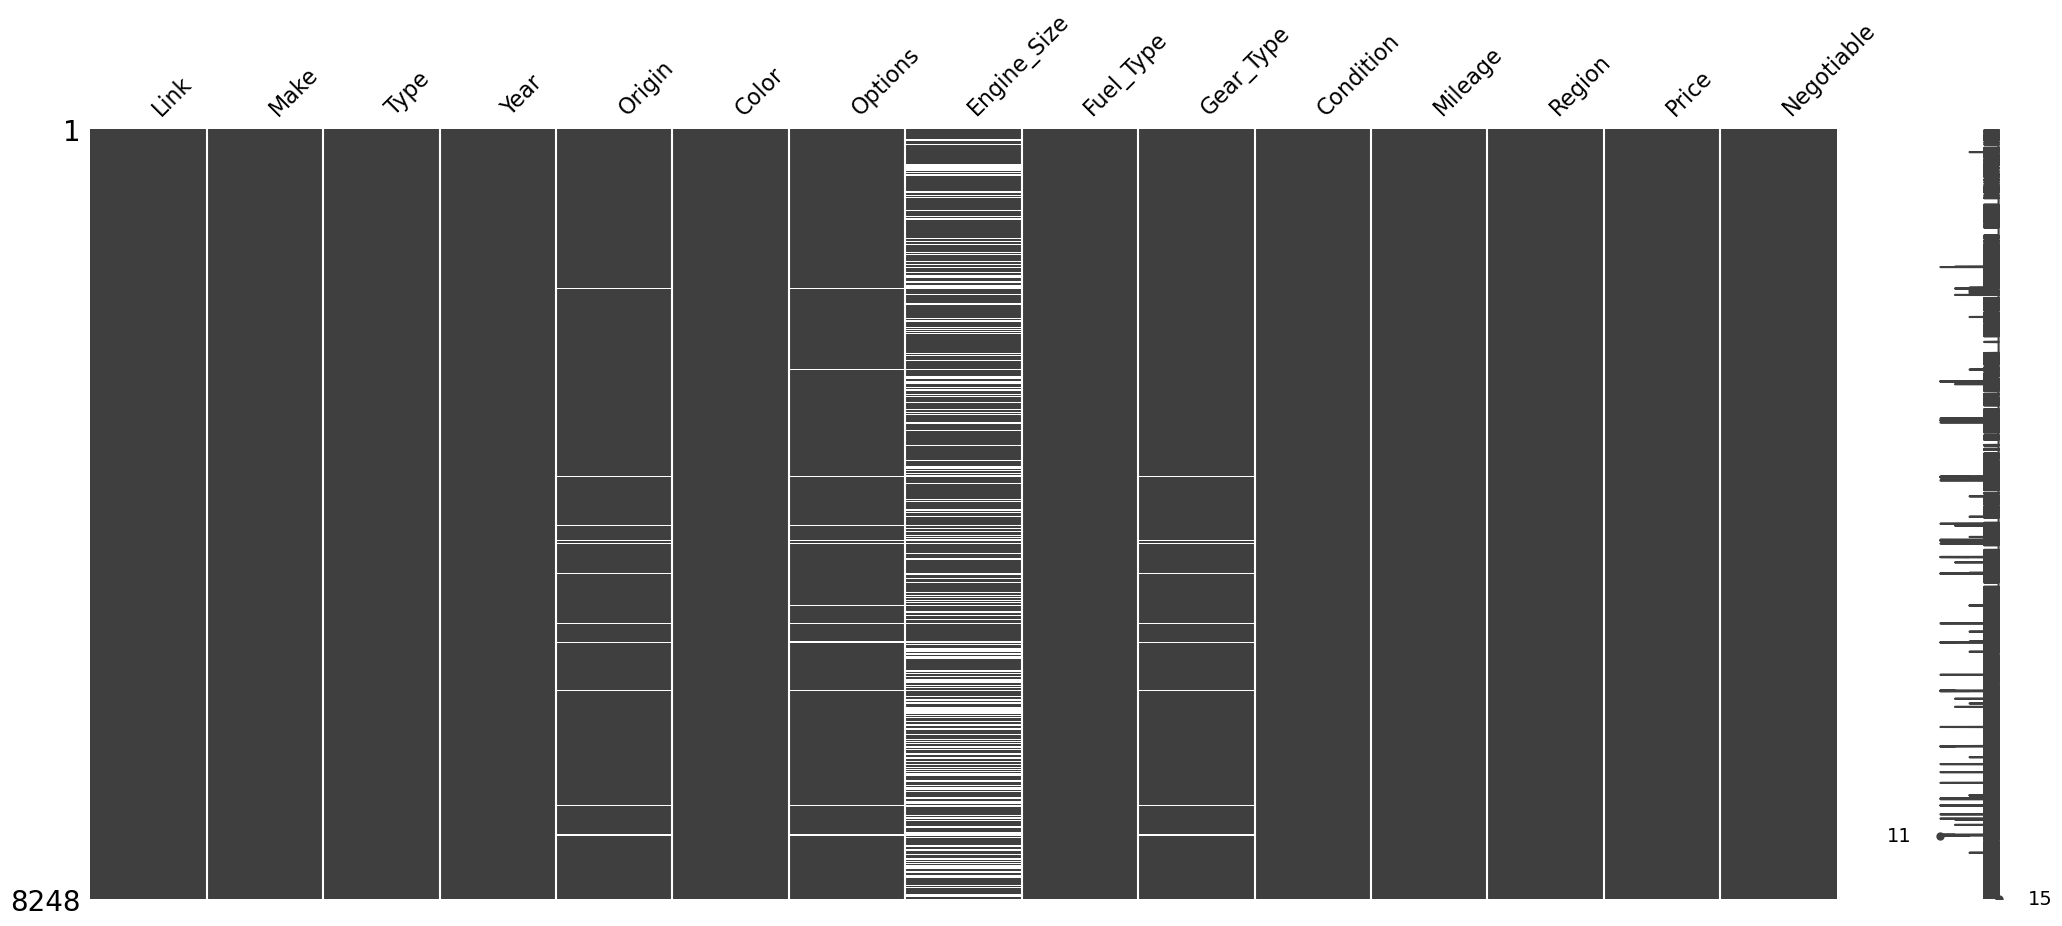

In [204]:
df.isnull().sum().sort_values(ascending=False)
msno.matrix(df)

Berdasarkan visualisasi **missingno matrix**, dataset ini secara umum tergolong **cukup bersih** karena sebagian besar kolom terlihat solid tanpa celah, menandakan tidak adanya missing value yang signifikan pada fitur utama seperti `Link`, `Make`, `Type`, `Year`, `Color`, `Fuel_Type`, `Condition`, `Mileage`, `Region`, `Price`, dan `Negotiable`; satu-satunya isu besar terdapat pada `Engine_Size` yang menunjukkan banyak missing value yang tersebar acak sehingga kemungkinan bersifat *Missing at Random (MAR)* dan sebaiknya ditangani dengan imputasi berbasis karakteristik kendaraan (misalnya `Make–Type–Year`), sementara `Origin`, `Options`, dan `Gear_Type` hanya memiliki missing ringan yang dapat diisi dengan nilai modus atau kategori “Unknown”, serta tidak terlihat pola missing yang saling bergantung antar kolom, sehingga penghapusan baris tidak direkomendasikan dan fokus preprocessing cukup diarahkan pada imputasi `Engine_Size`.

### 2.2.6 Melihat Normalitas Numerik

In [205]:
def check_normality(df, cols=None):
    """
    Fungsi untuk memeriksa normalitas distribusi numerik:
    - Menampilkan skewness & kurtosis
    - Menampilkan histogram + KDE dan boxplot untuk tiap kolom

    Parameters
    ----------
    df : pd.DataFrame
        Dataframe input
    cols : list (opsional)
        Daftar kolom yang ingin dianalisis. Jika None → semua kolom numerik.
    """

    # Buat salinan agar data asli aman
    df_temp = df.copy()

    # Tentukan kolom numerik
    if cols is None:
        cols = df_temp.select_dtypes(include=[np.number]).columns.tolist()

    # Konversi kolom ke numerik sementara (jaga-jaga kalau masih object)
    for col in cols:
        df_temp[col] = pd.to_numeric(df_temp[col], errors='coerce')

    # Hitung skewness & kurtosis
    normality_df = df_temp[cols].agg(['skew', 'kurtosis']).transpose()
    print("\n📊 Ringkasan Skewness & Kurtosis:")
    display(normality_df)

    # Visualisasi tiap kolom
    for col in cols:
        fig, axes = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={'height_ratios': [3, 1]})

        # Histogram + KDE
        sns.histplot(df_temp[col], kde=True, ax=axes[0], color='skyblue')
        axes[0].set_title(f'Distribusi {col}', fontsize=12)
        axes[0].set_xlabel('')

        # Boxplot
        sns.boxplot(x=df_temp[col], ax=axes[1], color='lightcoral')
        axes[1].set_title(f'Boxplot {col}', fontsize=11)

        plt.tight_layout()
        plt.show()


📊 Ringkasan Skewness & Kurtosis:


,skew,kurtosis
Year,-2.615889,12.729579


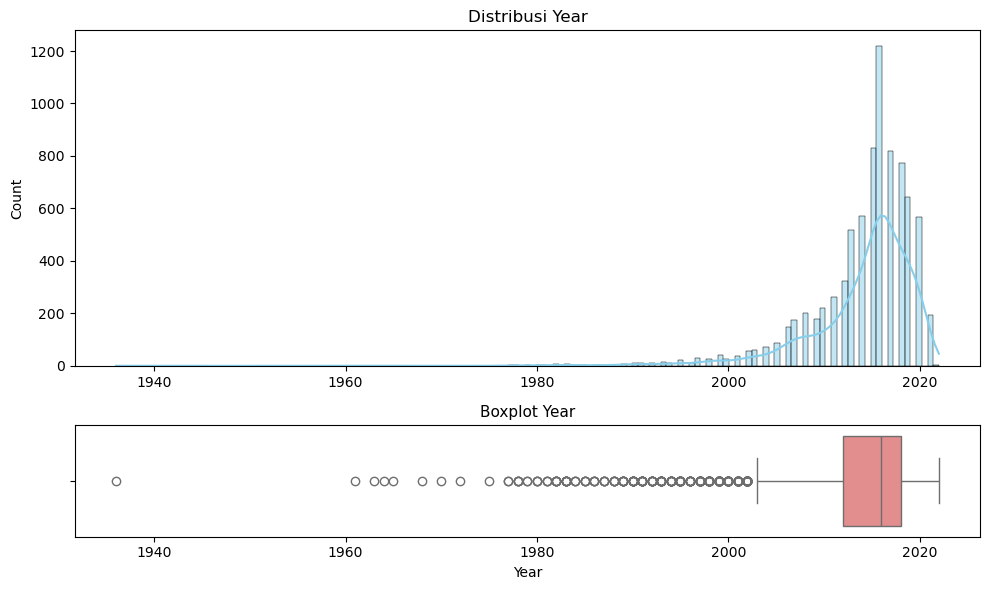

In [206]:
# Jalankan analisis normalitas per kolom
check_normality(df, ['Year'])

Berdasarkan histogram dan boxplot **Year**, terlihat bahwa mayoritas mobil dalam dataset diproduksi pada rentang **tahun 2010–2020**, dengan puncak distribusi sekitar **2015–2018**, yang mencerminkan dominasi mobil relatif modern di pasar mobil bekas Arab Saudi; namun terdapat **ekor panjang ke kiri** dengan beberapa nilai tahun yang sangat tua (bahkan sebelum 1960 dan satu titik ekstrem sekitar 1936) yang jelas merupakan **outlier/anomali data**, sebagaimana ditunjukkan oleh banyak titik di luar whisker pada boxplot, sehingga secara analitis masuk akal untuk melakukan **filter atau pembatasan tahun minimum** (misalnya ≥ 1990 atau ≥ 2000) agar distribusi lebih realistis dan tidak mengganggu pemodelan harga, terutama jika fitur turunan seperti *Car_Age* akan digunakan.


📊 Ringkasan Skewness & Kurtosis:


,skew,kurtosis
Engine_Size,0.948518,0.599946


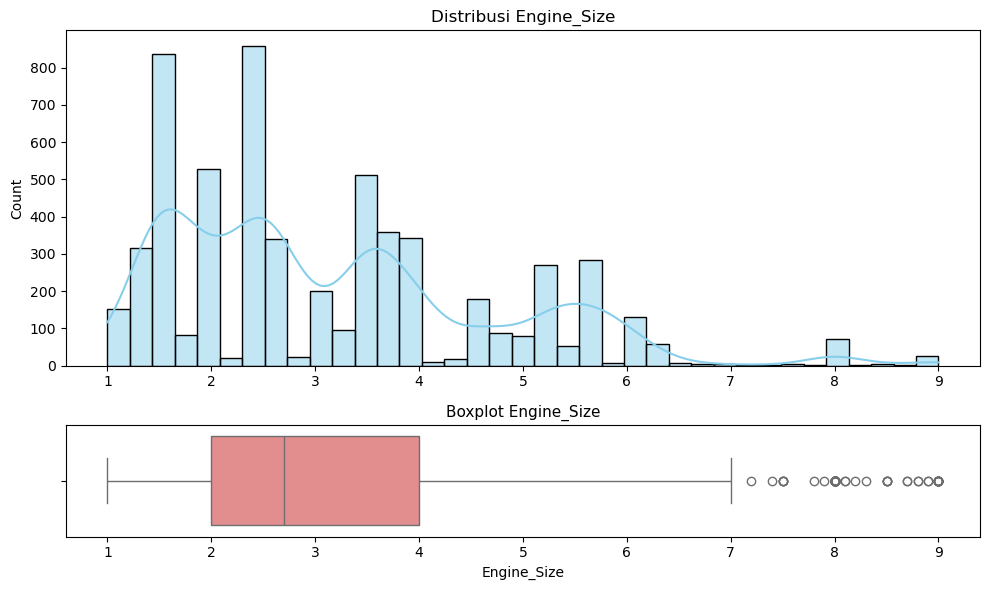

In [207]:
check_normality(df, ['Engine_Size'])

Berdasarkan histogram dan boxplot **Engine_Size**, terlihat bahwa distribusi ukuran mesin didominasi oleh kapasitas **kecil hingga menengah (sekitar 1.5–4.0 liter)** dengan puncak kepadatan di kisaran **2.0–3.0 liter**, yang mencerminkan mayoritas kendaraan penumpang dalam dataset, sementara terdapat **ekor panjang ke kanan** hingga **9.0 liter** yang sebagian besar muncul sebagai **outlier** pada boxplot dan kemungkinan merepresentasikan kendaraan besar seperti SUV atau pickup berkapasitas tinggi; secara statistik, nilai di atas sekitar **7.0 liter** sudah berada di luar whisker sehingga perlu dipertimbangkan apakah akan dipertahankan sebagai segmen khusus kendaraan besar atau dibatasi (capping/winsorizing) agar tidak memberi pengaruh berlebihan pada model regresi harga, terutama jika `Engine_Size` digunakan sebagai fitur numerik kontinu.


📊 Ringkasan Skewness & Kurtosis:


,skew,kurtosis
Mileage,29.592851,1438.938083


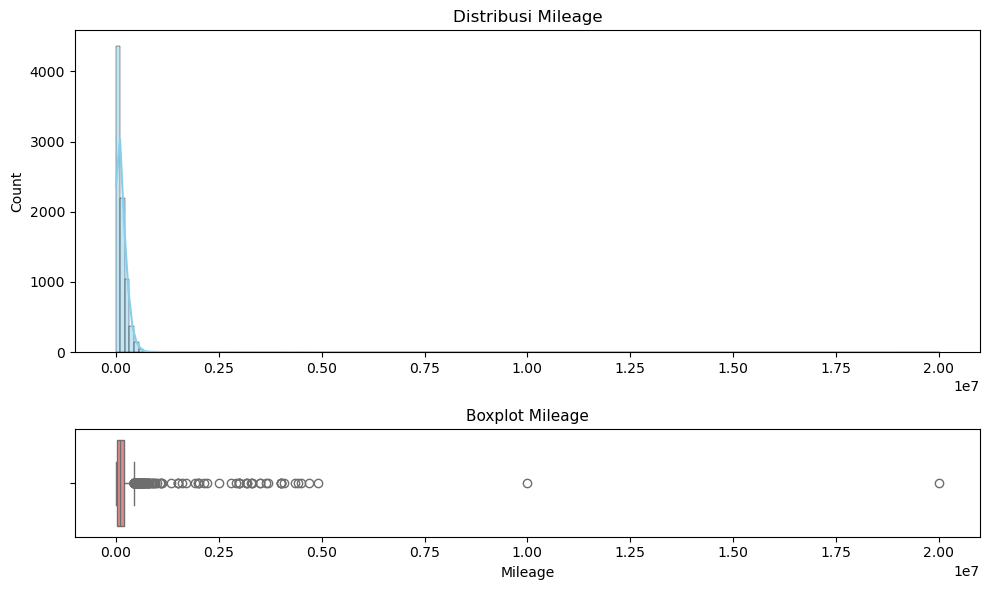

In [208]:
check_normality(df, ['Mileage'])

Berdasarkan histogram dan boxplot **Mileage**, terlihat bahwa distribusi jarak tempuh sangat **right-skewed**, dengan mayoritas mobil berada pada mileage relatif rendah hingga menengah (puluhan hingga ratusan ribu kilometer), sementara terdapat **ekor panjang ekstrem** hingga puluhan juta kilometer yang muncul jelas sebagai **outlier** pada boxplot dan hampir pasti merupakan kesalahan pencatatan atau anomali data; kondisi ini membuat nilai ekstrem tersebut berpotensi mendistorsi analisis dan pemodelan, sehingga secara praktis disarankan untuk melakukan **filter batas atas yang realistis** (misalnya ≤ 300.000–500.000 km), atau menerapkan **capping/winsorization** atau transformasi log pada `Mileage` agar distribusi lebih stabil dan representatif untuk model regresi harga.


📊 Ringkasan Skewness & Kurtosis:


,skew,kurtosis
Price,3.691729,24.285586


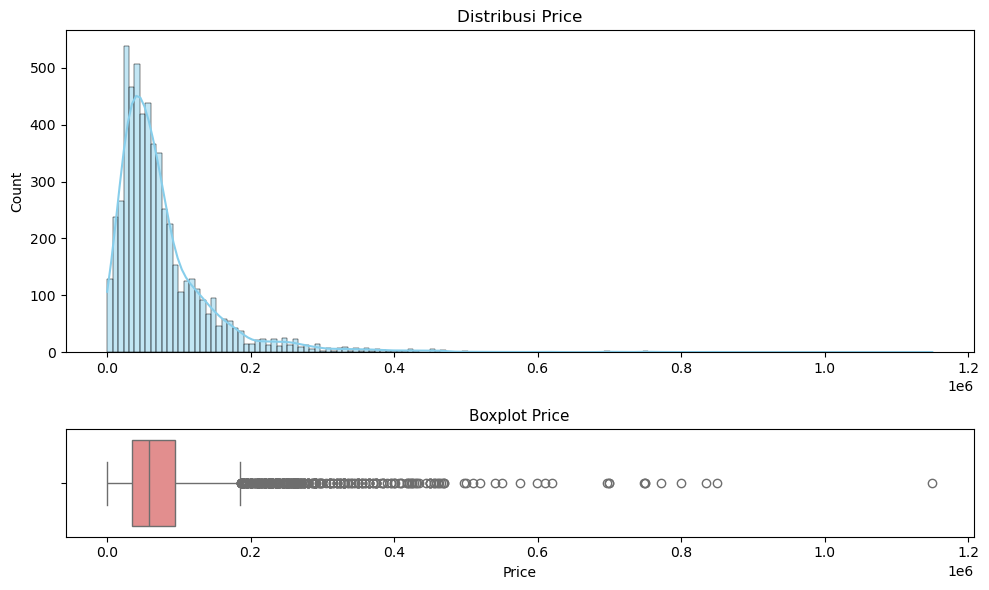

In [209]:
check_normality(df, ['Price'])

Berdasarkan histogram dan boxplot **Price**, terlihat bahwa distribusi harga sangat **right-skewed**, dengan mayoritas mobil berada pada rentang harga rendah hingga menengah dan puncak kepadatan di kisaran puluhan ribu hingga sekitar seratus ribu (SAR), sementara terdapat **ekor panjang ke kanan** hingga di atas **1 juta SAR** yang muncul sebagai banyak **outlier** pada boxplot dan merepresentasikan kendaraan premium atau anomali harga; pola ini menunjukkan bahwa harga tidak berdistribusi normal dan berpotensi mendistorsi pemodelan regresi berbasis error kuadrat, sehingga secara analitis disarankan untuk melakukan **transformasi log pada `Price`**, serta mempertimbangkan **capping/winsorization** atau segmentasi pasar (misalnya mass vs premium) agar model lebih stabil dan akurat dalam memprediksi harga wajar.

## 2.5 Menangani Missing Values

In [210]:
df = df.copy()

# Imputasi Engine_Size dengan modus per (Type, Year)
engine_group_mode = (
    df.groupby(['Type', 'Year'])['Engine_Size']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
)

def fill_engine_size(row):
    if pd.notna(row['Engine_Size']):
        return row['Engine_Size']
    key = (row['Type'], row['Year'])
    val = engine_group_mode.get(key, np.nan)
    return val

df['Engine_Size'] = df.apply(fill_engine_size, axis=1)

# Jika masih ada NaN, isi dengan modus global
if df['Engine_Size'].isna().sum() > 0:
    global_mode = df['Engine_Size'].mode().iloc[0]
    df['Engine_Size'].fillna(global_mode, inplace=True)

# Imputasi Gear_Type
if df['Gear_Type'].isna().sum() > 0:
    gear_mode = df['Gear_Type'].mode().iloc[0]
    df['Gear_Type'].fillna(gear_mode, inplace=True)

# Untuk kolom kategorikal lainnya
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col].fillna('Unknown', inplace=True)

print('Missing values setelah imputasi:')
df.isna().sum().sum()

Missing values setelah imputasi:


np.int64(0)

Strategi imputasi yang diterapkan menggunakan pendekatan yang **konservatif dan berorientasi pada konteks data**, di mana nilai **ukuran mesin** yang hilang diisi berdasarkan nilai yang paling sering muncul pada kendaraan dengan **tipe dan tahun produksi yang sama** agar tetap merefleksikan karakteristik teknis kendaraan; apabila setelah tahap tersebut masih terdapat nilai yang hilang, digunakan nilai ukuran mesin yang paling umum secara keseluruhan sebagai langkah pengaman. Selanjutnya, nilai **jenis transmisi** yang hilang diisi dengan kategori yang paling dominan dalam dataset, sedangkan nilai hilang pada kolom kategorikal lainnya diisi dengan label **“Unknown”** untuk menjaga kelengkapan data tanpa menimbulkan asumsi yang berlebihan.

## 2.6 Menghapus Kolom yang Tidak Relevan

In [211]:
cols_to_drop = ['Link', 'Condition', 'Negotiable']
df.drop(columns=[c for c in cols_to_drop if c in df.columns], inplace=True, errors='ignore')
df.shape

(8248, 12)

Selanjutnya dilakukan **penghapusan kolom yang tidak relevan atau tidak informatif** untuk analisis dan pemodelan, yaitu **`Link`** karena hanya berfungsi sebagai identifier unik dan tidak memiliki nilai prediktif, **`Condition`** karena seluruh observasinya bernilai sama (semua *“Used”*) sehingga tidak memberikan variasi informasi, serta **`Negotiable`** yang tidak digunakan dalam konteks pemodelan harga pada tahap ini; setelah proses ini, dataset tersisa **12 kolom** yang lebih ringkas dan fokus pada fitur-fitur yang berpotensi memengaruhi harga kendaraan.

## 2.7 Menghapus Duplikat

In [212]:
print('Jumlah duplikat sebelum dihapus:', df.duplicated().sum())

df = df.drop_duplicates().reset_index(drop=True)

print('Jumlah baris setelah duplikat dihapus:', df.shape)

Jumlah duplikat sebelum dihapus: 71
Jumlah baris setelah duplikat dihapus: (8177, 12)


Selanjutnya dilakukan **pemeriksaan dan penghapusan data duplikat**, di mana teridentifikasi **71 baris duplikat** dalam dataset; seluruh baris tersebut kemudian dihapus untuk mencegah bias dan redundansi dalam analisis maupun pemodelan, sehingga jumlah data berkurang menjadi **8.177 baris dengan 12 kolom**, yang merepresentasikan observasi unik dan lebih andal untuk tahap selanjutnya.

## 2.8 Menangani Outlier

In [213]:
df = df[pd.to_numeric(df['Price'], errors='coerce').notna()].copy()
df['Price'] = df['Price'].astype(float)

print('Jumlah baris setelah memastikan Price numerik:', df.shape)

def remove_outliers_iqr(df, col, k=1.5, verbose=True):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    mask = (df[col] >= lower_bound) & (df[col] <= upper_bound)
    df_clean = df[mask].copy()

    if verbose:
        print(f'[{col}] Batas bawah: {lower_bound:.2f}, batas atas: {upper_bound:.2f}')
        print(f'[{col}] Baris sebelum: {df.shape[0]}, setelah: {df_clean.shape[0]}')
        print('-' * 50)

    return df_clean  # <-- hanya kembalikan dataframe

df = remove_outliers_iqr(df, 'Year')
df = remove_outliers_iqr(df, 'Engine_Size')
df = remove_outliers_iqr(df, 'Mileage')
df = remove_outliers_iqr(df, 'Price')

Jumlah baris setelah memastikan Price numerik: (5593, 12)
[Year] Batas bawah: 2005.50, batas atas: 2025.50
[Year] Baris sebelum: 5593, setelah: 5318
--------------------------------------------------
[Engine_Size] Batas bawah: -1.00, batas atas: 7.00
[Engine_Size] Baris sebelum: 5318, setelah: 5274
--------------------------------------------------
[Mileage] Batas bawah: -144000.00, batas atas: 368000.00
[Mileage] Baris sebelum: 5274, setelah: 5127
--------------------------------------------------
[Price] Batas bawah: -52000.00, batas atas: 188000.00
[Price] Baris sebelum: 5127, setelah: 4781
--------------------------------------------------


Pada tahap ini dilakukan **pembersihan lanjutan dengan metode IQR secara berurutan pada beberapa kolom numerik**, dimulai dengan memastikan kolom `Price` hanya berisi nilai numerik sehingga dataset menyisakan **5.593 baris** yang valid; selanjutnya, outlier dihapus secara bertahap menggunakan metode **Interquartile Range (IQR)** pada kolom `Year`, `Engine_Size`, `Mileage`, dan `Price`, di mana setiap kolom difilter berdasarkan batas bawah dan atas statistiknya masing-masing agar nilai yang tidak realistis atau ekstrem tidak mendistorsi analisis. Proses ini secara bertahap mengurangi jumlah data menjadi **4.781 baris**, dengan setiap penghapusan dilakukan secara terkontrol dan transparan (ditunjukkan oleh jumlah baris sebelum dan sesudah), sehingga dataset akhir menjadi lebih bersih, stabil, dan representatif untuk analisis lanjutan maupun pemodelan regresi harga kendaraan.

## 2.11 Konversi Tipe Data

In [214]:
# =========================
# 1. Kolom numerik
# =========================
numeric_cols = ['Year', 'Mileage', 'Engine_Size', 'Price']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# =========================
# 2. Kolom kategorikal
# =========================
categorical_cols = [
    'Make', 'Type', 'Origin', 'Color',
    'Options', 'Fuel_Type', 'Gear_Type', 'Region'
]
for col in categorical_cols:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4781 entries, 0 to 8176
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Make         4781 non-null   category
 1   Type         4781 non-null   category
 2   Year         4781 non-null   int64   
 3   Origin       4781 non-null   category
 4   Color        4781 non-null   category
 5   Options      4781 non-null   category
 6   Engine_Size  4781 non-null   float64 
 7   Fuel_Type    4781 non-null   category
 8   Gear_Type    4781 non-null   category
 9   Mileage      4781 non-null   int64   
 10  Region       4781 non-null   category
 11  Price        4781 non-null   float64 
dtypes: category(8), float64(2), int64(2)
memory usage: 244.6 KB


Pada tahap ini dilakukan **standarisasi tipe data** agar dataset siap digunakan untuk analisis dan pemodelan, di mana seluruh kolom **numerik** (`Year`, `Mileage`, `Engine_Size`, `Price`) dipastikan bertipe numerik untuk mendukung perhitungan statistik dan algoritma regresi, sementara kolom **kategorikal** (`Make`, `Type`, `Origin`, `Color`, `Options`, `Fuel_Type`, `Gear_Type`, `Region`) dikonversi ke tipe `category` untuk efisiensi memori dan kemudahan proses encoding; hasilnya, dataset akhir terdiri dari **4.781 baris dan 12 kolom** tanpa missing value, dengan komposisi **8 fitur kategorikal dan 4 fitur numerik**, serta penggunaan memori yang jauh lebih efisien (~245 KB), sehingga sudah berada pada kondisi yang bersih, konsisten, dan siap masuk ke tahap pemodelan.

## 2.11 Exploratory Data Analysis

### 2.11.1 Analisis Univariat


📊 Ringkasan Skewness & Kurtosis:


,skew,kurtosis
Engine_Size,0.664139,-0.46971


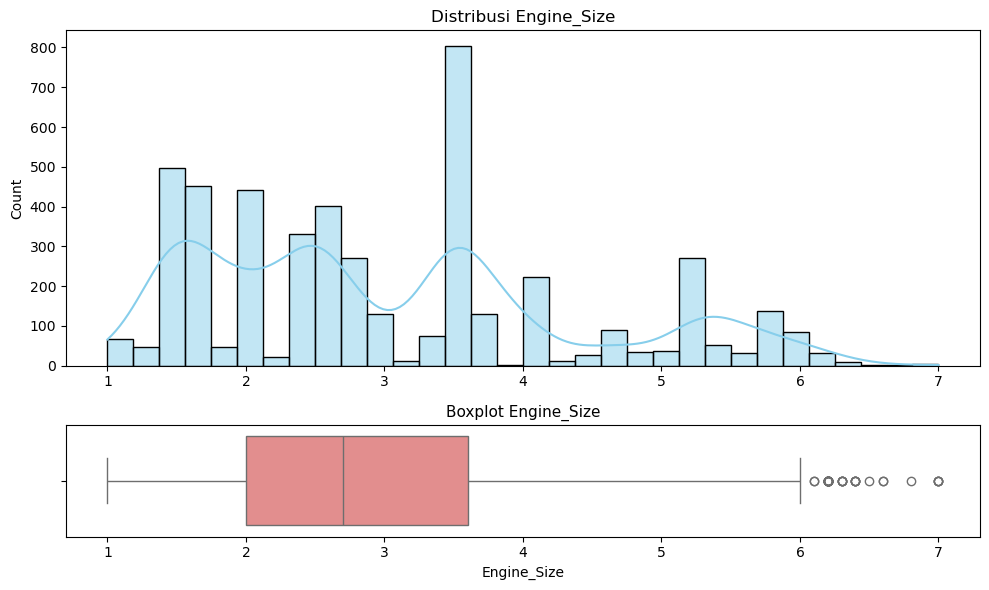

In [215]:
check_normality(df, ['Engine_Size'])

Berdasarkan histogram dan boxplot **Engine_Size** setelah proses pembersihan data, terlihat bahwa distribusi ukuran mesin kini lebih terkonsentrasi dan realistis, dengan mayoritas kendaraan berada pada rentang **2.0–3.5 liter** dan puncak distribusi sekitar **2.5–3.0 liter**, yang mencerminkan dominasi mobil penumpang dan SUV menengah di pasar; ekor kanan masih terlihat hingga sekitar **6.0–7.0 liter**, namun jumlahnya jauh lebih sedikit dan merepresentasikan kendaraan berkapasitas besar, sementara boxplot menunjukkan hanya segelintir titik ekstrem di atas whisker yang menandakan outlier ringan, sehingga secara keseluruhan distribusi `Engine_Size` sudah jauh lebih stabil, masuk akal secara bisnis, dan layak digunakan sebagai fitur numerik dalam pemodelan harga tanpa perlu pembersihan tambahan yang agresif.


📊 Ringkasan Skewness & Kurtosis:


,skew,kurtosis
Mileage,0.698284,-0.157377


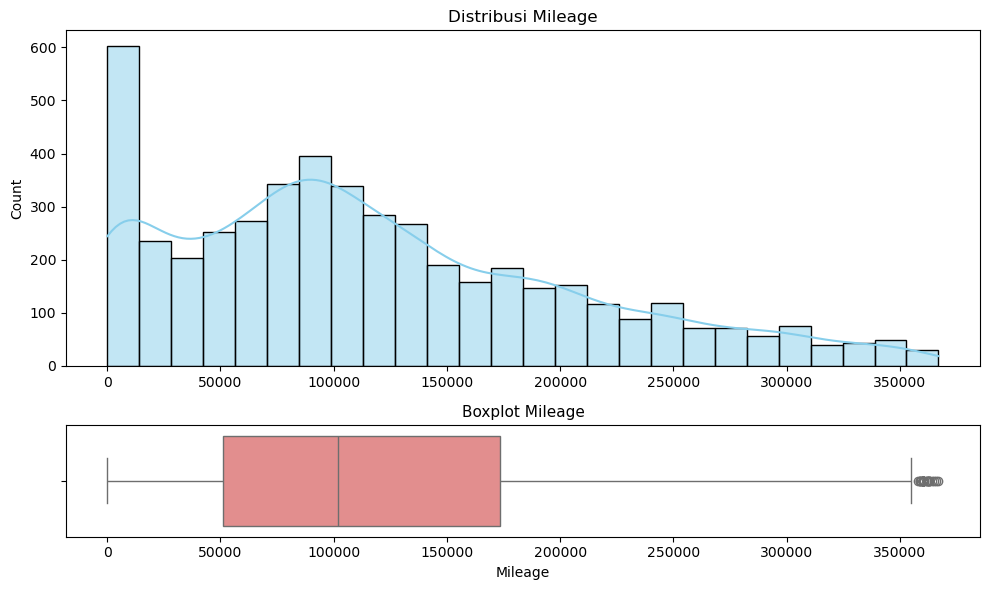

In [216]:
check_normality(df, ['Mileage'])

Berdasarkan histogram dan boxplot **Mileage** setelah proses pembersihan data, terlihat bahwa distribusi jarak tempuh kini jauh lebih terkendali dan realistis, dengan mayoritas kendaraan berada pada kisaran **50.000–150.000 km** serta median sekitar **100.000 km**, yang mencerminkan kondisi tipikal mobil bekas; ekor kanan masih ada hingga sekitar **350.000–370.000 km**, namun jumlahnya relatif sedikit dan dapat dianggap sebagai kendaraan dengan pemakaian tinggi yang masih wajar, sementara boxplot menunjukkan hanya outlier ringan di ujung kanan tanpa adanya nilai ekstrem yang tidak masuk akal, sehingga variabel `Mileage` sudah cukup stabil dan layak digunakan langsung sebagai fitur numerik dalam pemodelan harga.


📊 Ringkasan Skewness & Kurtosis:


,skew,kurtosis
Price,0.931783,0.340135


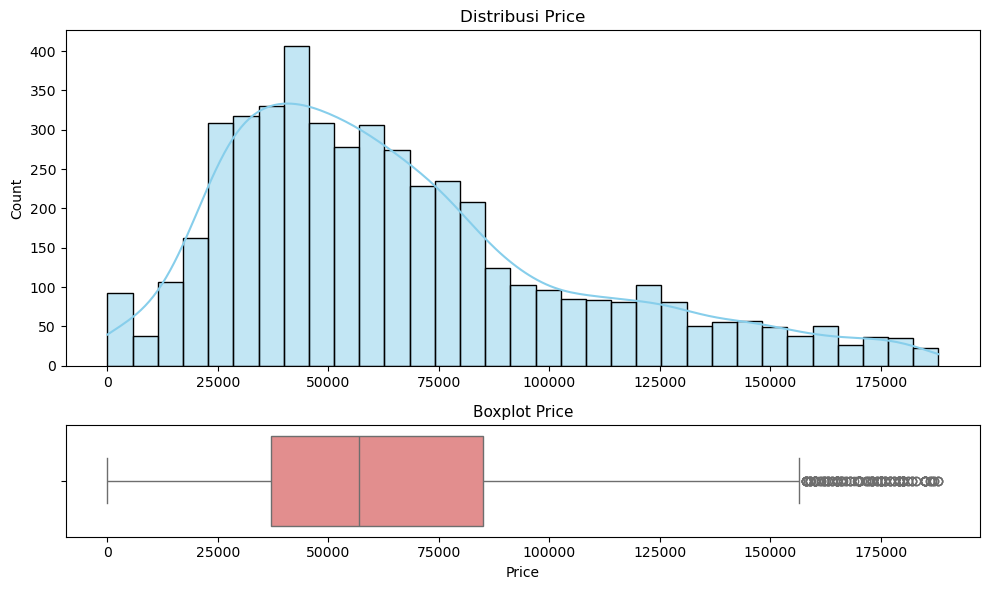

In [217]:
check_normality(df, ['Price'])

Berdasarkan histogram dan boxplot **Price** setelah proses pembersihan data, distribusi harga kini terlihat jauh lebih wajar dan terkonsentrasi, dengan mayoritas kendaraan berada pada kisaran **30.000–80.000 SAR** serta median sekitar **50.000–60.000 SAR**, yang merepresentasikan segmen pasar mobil bekas menengah; meskipun distribusi masih **right-skewed**, ekor kanan hingga sekitar **180.000–190.000 SAR** kini mencerminkan kendaraan dengan harga lebih tinggi yang masih realistis, sementara boxplot hanya menunjukkan outlier ringan di bagian atas tanpa adanya nilai ekstrem yang tidak masuk akal, sehingga variabel `Price` sudah cukup stabil, representatif, dan layak digunakan sebagai target dalam pemodelan regresi harga tanpa memerlukan penanganan tambahan yang agresif.

In [218]:
def countplot_categorical(
    df,
    cols=None,
    top_n=10,
    figsize=(10, 5),
    show_percent=True
):
    """
    Menampilkan countplot untuk kolom kategorikal (non-numerikal).
    """

    # Jika kolom tidak ditentukan, ambil semua kolom kategorikal
    if cols is None:
        cols = df.select_dtypes(include='object').columns.tolist()

    for col in cols:
        data = (
            df[col]
            .value_counts(dropna=False)
            .head(top_n)
            .reset_index()
        )
        data.columns = [col, 'Count']
        data['Percentage'] = (data['Count'] / len(df)) * 100

        plt.figure(figsize=figsize)
        sns.barplot(
            data=data,
            y=col,
            x='Count',
            order=data[col],
            palette='Blues_r'
        )

        # 👉 Judul ditambahkan Top-N
        plt.title(
            f'Komposisi Data: {col} (Top {top_n})',
            fontsize=13
        )
        plt.xlabel('Jumlah')
        plt.ylabel(col)

        # Tambahkan label count & persentase
        for i, row in data.iterrows():
            label = f"{row['Count']}"
            if show_percent:
                label += f" ({row['Percentage']:.1f}%)"
            plt.text(
                row['Count'],
                i,
                label,
                va='center',
                fontsize=10
            )

        plt.tight_layout()
        plt.show()

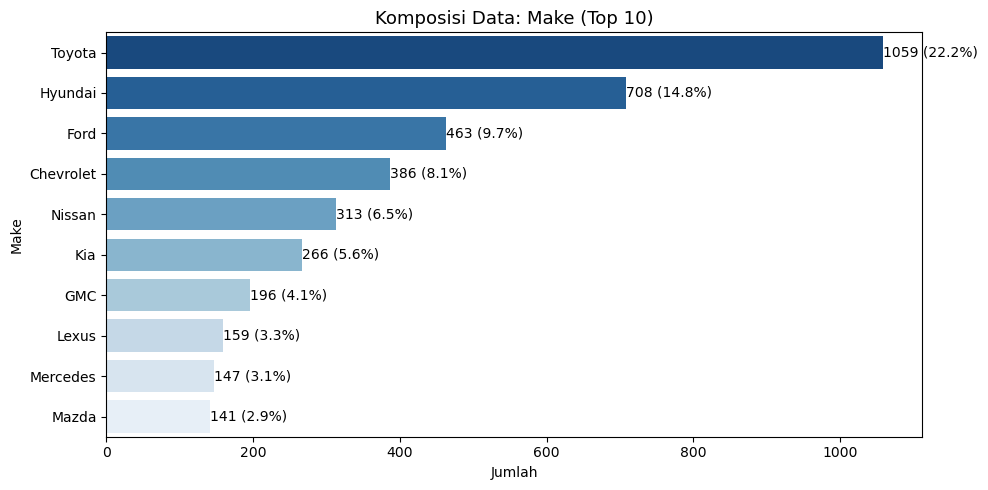

In [219]:
countplot_categorical(
    df,
    cols=['Make'],
    top_n=10
)

Lorem Ipsum

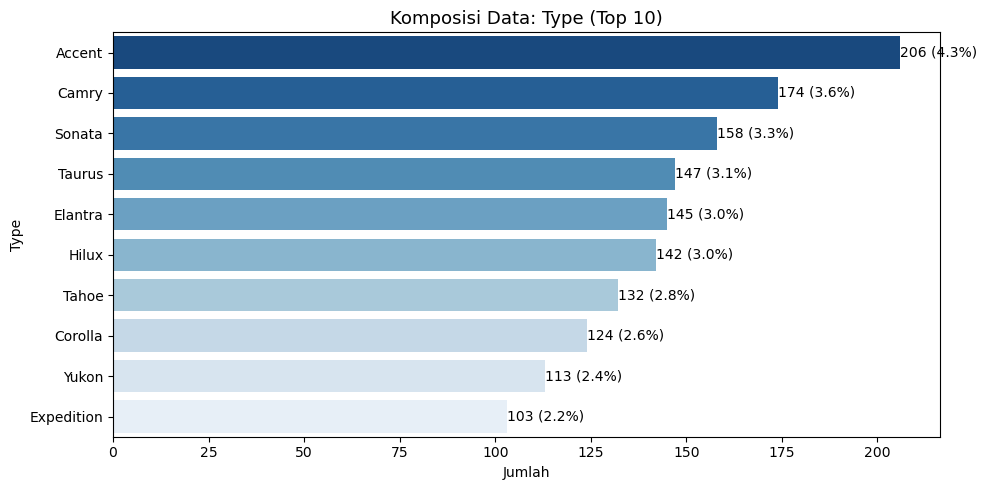

In [220]:
countplot_categorical(
    df,
    cols=['Type'],
    top_n=10
)

Lorem Ipsum

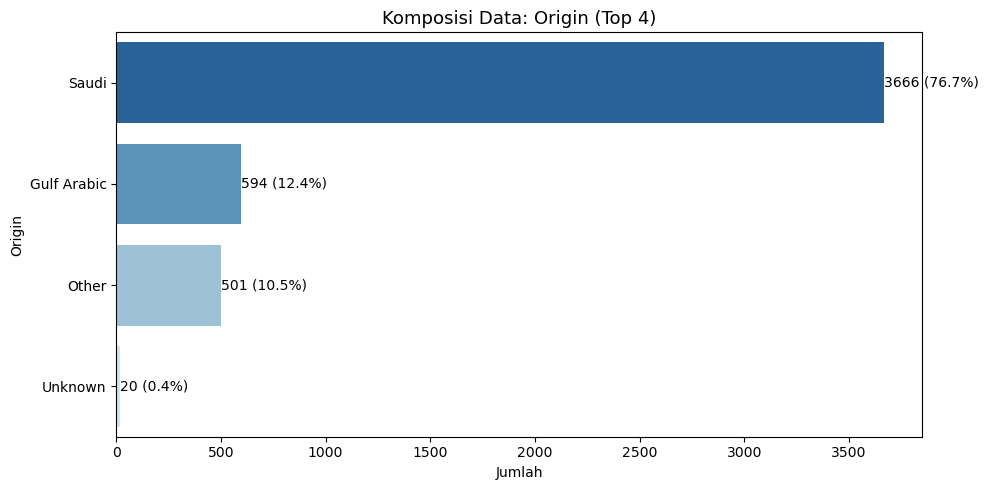

In [221]:
countplot_categorical(
    df,
    cols=['Origin'],
    top_n=df['Origin'].nunique()
)

Lorem Ipsum

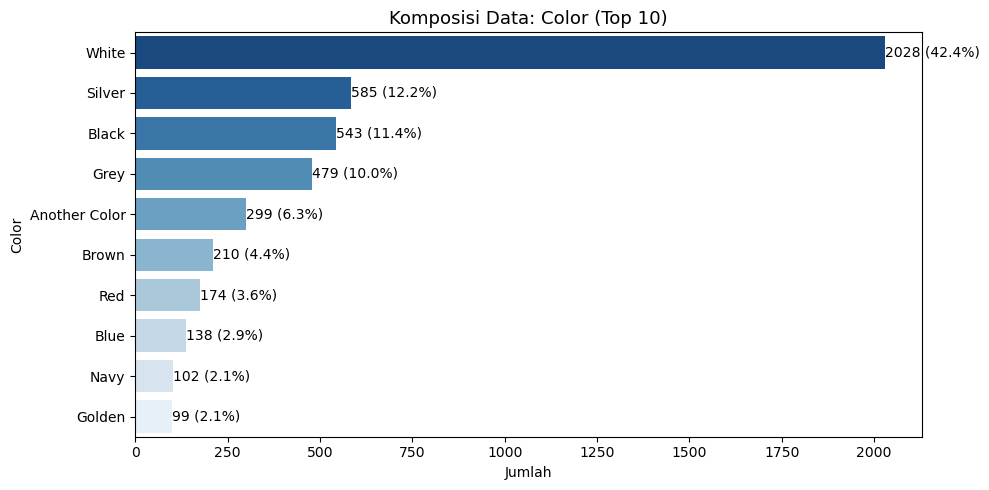

In [222]:
countplot_categorical(
    df,
    cols=['Color'],
    top_n=10
)

Lorem Ipsum

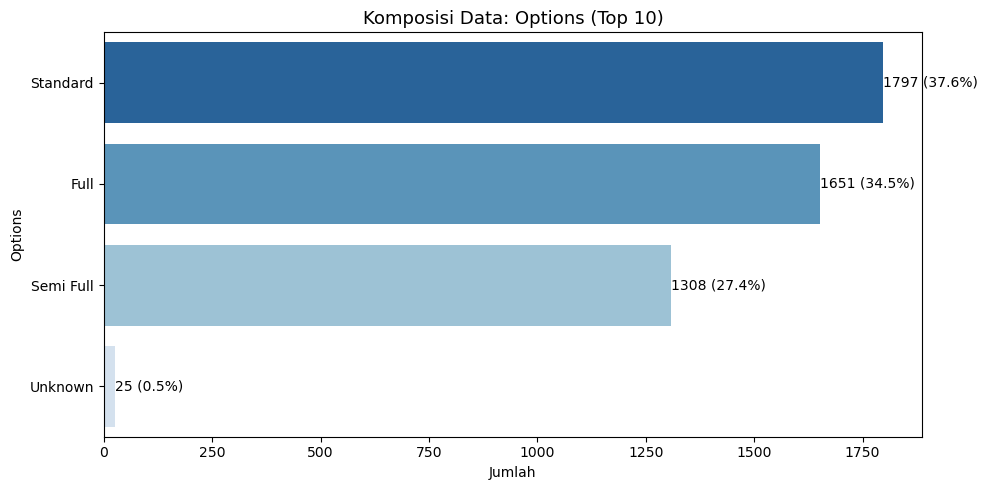

In [223]:
countplot_categorical(
    df,
    cols=['Options'],
    top_n=10
)

Lorem Ipsum

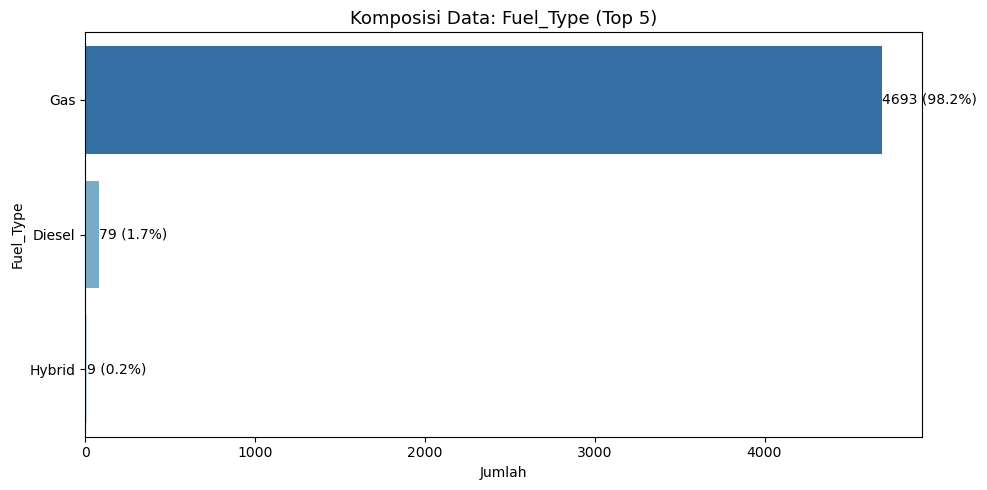

In [224]:
countplot_categorical(
    df,
    cols=['Fuel_Type'],
    top_n=5
)

Lorem Ipsum

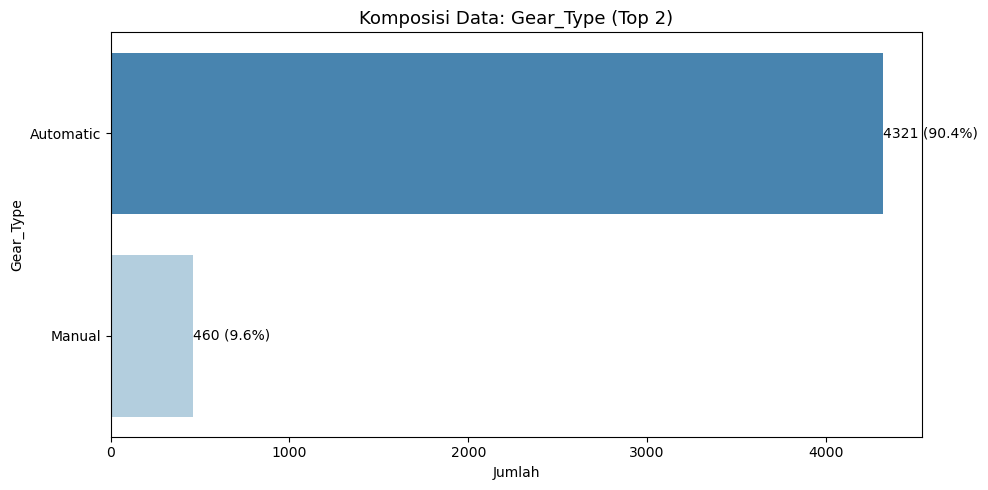

In [225]:
countplot_categorical(
    df,
    cols=['Gear_Type'],
    top_n=df['Gear_Type'].nunique()
)

Lorem Ipsum

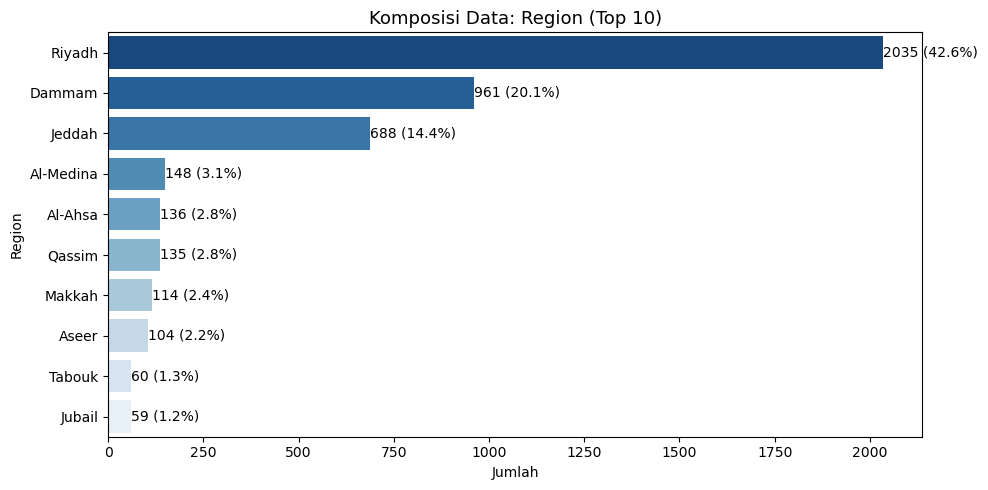

In [226]:
countplot_categorical(
    df,
    cols=['Region'],
    top_n=10
)

Lorem Ipsum

### 2.11.2 Analisis Bivariat

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# -----------------------------
# Kolom numerik (X) & target (y)
# -----------------------------
num_features = ['Year', 'Engine_Size', 'Mileage']
target = 'Price'

# Pastikan numerik
df_plot = df[num_features + [target]].copy()
for col in df_plot.columns:
    df_plot[col] = pd.to_numeric(df_plot[col], errors='coerce')

df_plot = df_plot.dropna()

# -----------------------------
# Fungsi scatter + garis merah
# -----------------------------
def scatter_with_trendline(df, x_col, y_col):
    x = df[x_col]
    y = df[y_col]

    # Hitung Spearman (opsional tapi informatif)
    rho, p = spearmanr(x, y)

    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, alpha=0.5)

    # Garis merah (linear trend)
    z = np.polyfit(x, y, 1)
    p_line = np.poly1d(z)
    plt.plot(
        x.sort_values(),
        p_line(x.sort_values()),
        color='red',
        linewidth=2
    )

    plt.title(
        f'{y_col} vs {x_col}\n'
        f'Spearman ρ = {rho:.2f}, p = {p:.2g}',
        fontsize=12
    )
    plt.xlabel(x_col)
    plt.ylabel(y_col)

    plt.tight_layout()
    plt.show()


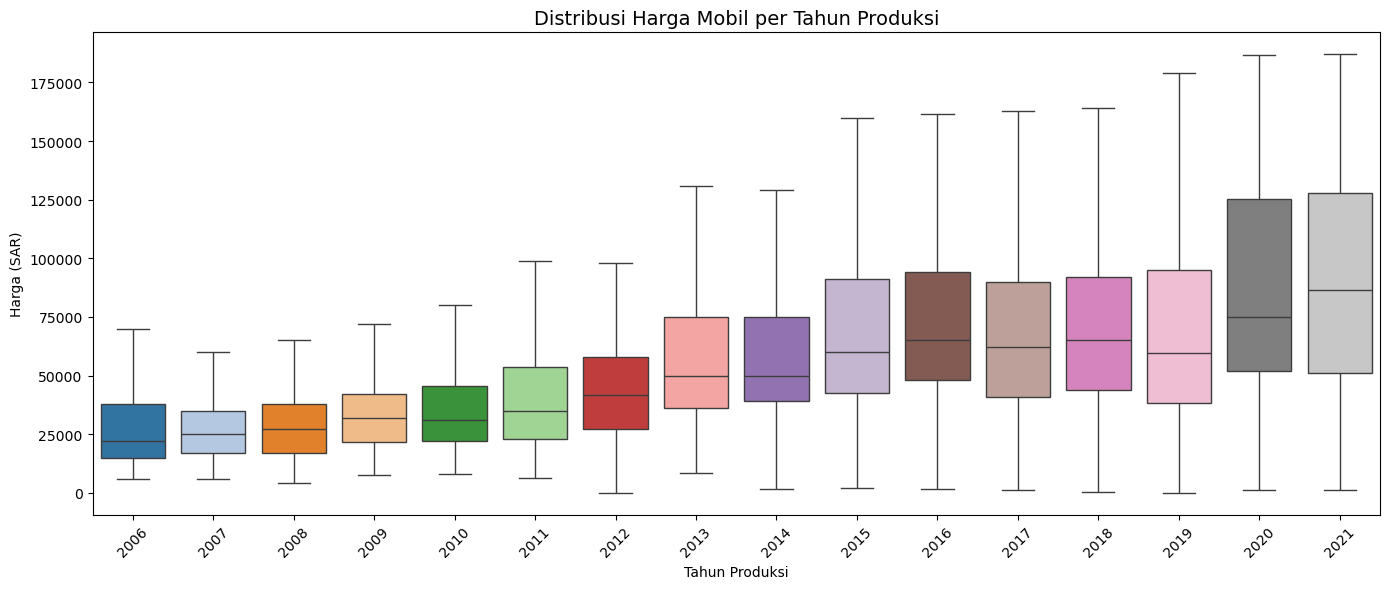

In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan kolom numerik
df_box = df[['Year', 'Price']].copy()
df_box['Year'] = pd.to_numeric(df_box['Year'], errors='coerce')
df_box['Price'] = pd.to_numeric(df_box['Price'], errors='coerce')

df_box = df_box.dropna()
df_box = df_box.sort_values('Year')

plt.figure(figsize=(14, 6))

sns.boxplot(
    data=df_box,
    x='Year',
    y='Price',
    hue='Year',
    dodge=False,
    showfliers=False,
    palette='tab20'   # <-- kategorikal, TIDAK gradasi
)

plt.title('Distribusi Harga Mobil per Tahun Produksi', fontsize=14)
plt.xlabel('Tahun Produksi')
plt.ylabel('Harga (SAR)')

plt.xticks(rotation=45)

# Legend dimatikan (tidak berguna karena sama dengan x-axis)
plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()

Lorem Ipsum

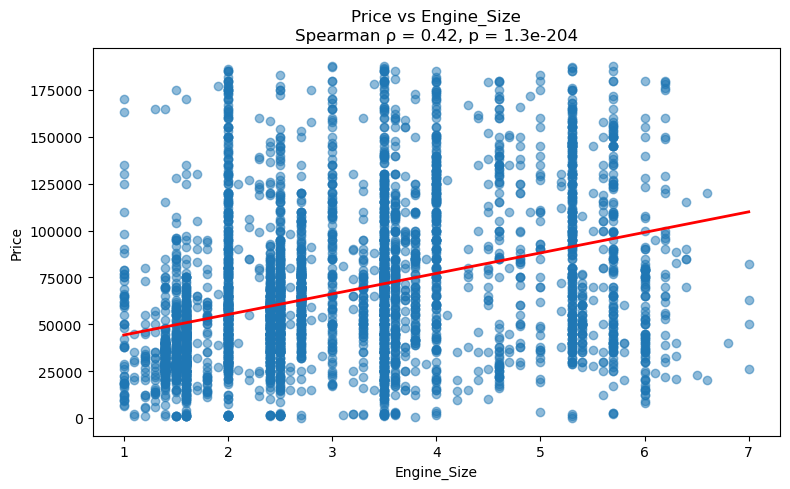

In [229]:
scatter_with_trendline(
    df_plot,
    x_col='Engine_Size',
    y_col='Price'
)

Lorem Ipsum

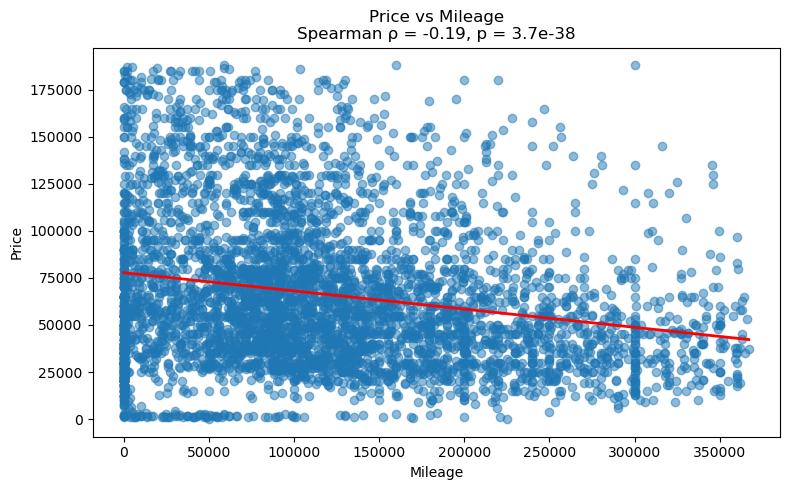

In [230]:
scatter_with_trendline(
    df_plot,
    x_col='Mileage',
    y_col='Price'
)

Lorem Ipsum

## 2.11 Simpan Dataset Bersih

In [231]:
df.to_csv('../Dataset/UsedCarsSA_Clean.csv', index=False)
print('Dataset bersih berhasil disimpan!')

Dataset bersih berhasil disimpan!
